In [ ]:
import numpy as np
import pandas as pd
!pip install docx2txt
import docx2txt
import re
import os
import gensim
!pip install stop_words
from stop_words import get_stop_words
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Lambda, Bidirectional
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.optimizers import Adadelta
from keras.callbacks import ModelCheckpoint
import keras.backend as K

  Created wheel for docx2txt: filename=docx2txt-0.8-cp36-none-any.whl size=3963 sha256=34090f700ed9e1c4126d3e102c834aeb69946fcc82dff2731ef66d25f5b169eb
  Stored in directory: /root/.cache/pip/wheels/b2/1f/26/a051209bbb77fc6bcfae2bb7e01fa0ff941b82292ab084d596
Successfully built docx2txt
  Created wheel for stop-words: filename=stop_words-2018.7.23-cp36-none-any.whl size=32917 sha256=45276080bbbf203bef2a2ff2a8cae4fe72004d5a82784efe8d7fa92eca0b2492
  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words


Using TensorFlow backend.


In [ ]:
#Ubah direktori sesuai lokasi penyimpanan dataset
DIR_DATA_MHS = '/content/drive/My Drive/KP-SEMINAR-SKRIPSI/SKRIPSI/Program/Dataset/jawaban_mahasiswa/'
DIR_DATA_DSN = '/content/drive/My Drive/KP-SEMINAR-SKRIPSI/SKRIPSI/Program/Dataset/jawaban_dosen/'
DIR_HUMAN_RATER_4 = '/content/drive/My Drive/KP-SEMINAR-SKRIPSI/SKRIPSI/Program/Dataset/human_rater4.csv'
DIR_DUMMY_DATA = '/content/drive/My Drive/KP-SEMINAR-SKRIPSI/SKRIPSI/Program/Dataset/dummy_dataset2.csv'
DIR_DUMMY_DATA2 = '/content/drive/My Drive/KP-SEMINAR-SKRIPSI/SKRIPSI/Program/Dataset/dummy_dataset3.csv'
DIR_W2V_MODELS = '/content/drive/My Drive/KP-SEMINAR-SKRIPSI/SKRIPSI/Program/Dataset/word2vec_models/'

In [ ]:
stop_words = get_stop_words('indonesian')
def preprocess(text):
  text = re.sub("[^A-Za-z0-9]", " ", text)
  text = re.sub("^[0-9]", " ", text)
  words = text.lower().split()
  words = " ".join([str(word) for word in words if not word in stop_words])
  return words

def get_data(size=36):
  files = []

  # for f in os.listdir(DIR_DATA_DSN):
  #   if f.endswith('.docx'):
  #     name = DIR_DATA_DSN+'/'+f
  #     files.append(name)

  for i in range(1,5):
    name = DIR_DATA_DSN+'jwb'+str(i)+'.docx'
    files.append(name)

  for i in range(1,5):
    name = DIR_DATA_DSN+'jwbdosen'+str(i)+'.docx'
    files.append(name)
  
  for i in range(1,size):
    name = DIR_DATA_MHS+'Mahasiswa'+str(i)+'.docx'
    files.append(name)

  documents = []
  for i in range(len(files)):
    text = docx2txt.process(files[i])
    text = text.splitlines()
    text = [x for x in text if x]
    documents.append(text)
    
  fullDocs = [documents[i][x] for i in range(len(documents)) for x in range(len(documents[i]))]

  finalText = []
  for doc in fullDocs:
    text = preprocess(doc)
    finalText.append(text)
  
  return finalText

In [ ]:
data = get_data()
print(len(data))

148


In [ ]:
X_right_test = data[0:4]*35
X_left_test = data[8:]
print(len(X_right_test))
print(len(X_left_test))

140
140


In [ ]:
X_right_test2 = data[4:8]*35
print(len(X_right_test2))
print(X_right_test2[0:8])

140
['von neumann komputer pertama menggunakan konsep penyimpanan dimana komponen komponennya prosesor memori input output', 'hibernate salah satu proses dimana komputer dimatikan dimatikan data berupa program dijalankan berada ram dialihkan hard disk rom data hilang jadi dinyalakan kembali data berupa program dinyalakan dikembalikan ram rom seakan komputer dimatikan sepenuhnya', 'server host menjadi tempat menyimpan data informasi dituju diakses client jaringan client host menjadi alat untuk mengakses meminta data informasi dikirim server client berfungsi untuk mengirimkan data informasi simpan server', 'turbo boost cara untuk meningkatkan kecepatan clock komputer menjadi kecepatan maksimal pengolahan data cepat kecepatan dimaksud kecepatan pengolahan transmisi data komputer', 'von neumann komputer pertama menggunakan konsep penyimpanan dimana komponen komponennya prosesor memori input output', 'hibernate salah satu proses dimana komputer dimatikan dimatikan data berupa program dijala

In [ ]:
print(X_right_test[0:8])

['komputer model von neumann model arsitektur dideskripsikan john von neumann tahun 1945 first draft of a report on the edvac model arsitektur dijadikan basis komputer unit pemrosesan berisi alu register prosesor unit kontrol berisi instruction register program counter memori untuk menyimpan data instruksi penyimpanan eksternal mekanisme input output', 'hibernate pc fitur mematikan pc untuk waktu sleep fitur menggunakan tenaga sleep menjaga komputer tetap menyala tenaga hibernate menyimpan proses berjalan secondary memory sleep menyimpannya ram komputer mengalami hilang tenaga komputer dinyalakan ulang awal berbeda hibernate melanjutkan proses dimatikan mengalami kehilangan tenaga mati kekurangan hibernate jumlah penyimpanan data dibutuhkan untuk hibernate storage cukup besar mengurangi umur ssd cepat proses menghidupkan kembali secepat proses sleep membacanya ram', 'client server jaringan komputer model komunikasi terjadi dua belah pihak penyedia layanan data disebut server pengguna p

In [ ]:
y_df = pd.read_csv(DIR_HUMAN_RATER_4)
human_rater = y_df['nilai']
human_rater = human_rater.to_numpy()
# human_rater = human_rater[8:]
# Y = np.repeat(human_rater,4)
Y = human_rater.copy()
# Y = (Y-min(Y))/(max(Y)-min(Y))
Y_test1 = Y/100
print(Y_test1[:10])
print(len(Y_test1))
Y_test2 = Y.copy()
print(Y_test2[:10])
print(len(Y_test2))

[0.9 0.8 1.  1.  0.9 0.8 1.  1.  0.9 0.8]
140
[ 90  80 100 100  90  80 100 100  90  80]
140


In [ ]:
df = pd.read_csv(DIR_DUMMY_DATA)
X_left_train = df['jawaban_dummy'].values
X_right_train = df['jawaban_dosen'].values
Y_train = df['nilai_dummy'].values
Y_train1 = Y_train/100
Y_train2 = Y_train[:]

print(len(X_left_train))
print(len(X_right_train))
print(X_left_train[0:4])
print(X_right_train[0:4])
print(Y_train1[0:4])
print(Y_train2[0:4])

440
440
['komputer model von neumann model arsitektur dideskripsikan john von neumann tahun 1945 first draft of a report on the edvac model arsitektur dijadikan basis komputer unit pemrosesan berisi alu register prosesor unit kontrol berisi instruction register program counter memori untuk menyimpan data instruksi penyimpanan eksternal mekanisme input output'
 'hibernate pc fitur mematikan pc untuk waktu sleep fitur menggunakan tenaga sleep menjaga komputer tetap menyala tenaga hibernate menyimpan proses berjalan secondary memory sleep menyimpannya ram komputer mengalami hilang tenaga komputer dinyalakan ulang awal berbeda hibernate melanjutkan proses dimatikan mengalami kehilangan tenaga mati kekurangan hibernate jumlah penyimpanan data dibutuhkan untuk hibernate storage cukup besar mengurangi umur ssd cepat proses menghidupkan kembali secepat proses sleep membacanya ram'
 'client server jaringan komputer model komunikasi terjadi dua belah pihak penyedia layanan data disebut server pe

In [ ]:
dfk = pd.read_csv(DIR_DUMMY_DATA2)
X_left_train_k = dfk['jawaban_dummy'].values
X_right_train_k = dfk['jawaban_dosen'].values
Y_train_k = dfk['nilai_dummy'].values
Y_train1_k = Y_train_k/100
Y_train2_k = Y_train_k[:]

print(len(X_left_train_k))
print(len(X_right_train_k))
print(X_left_train_k[0:4])
print(X_right_train_k[0:4])
print(Y_train1_k[0:4])
print(Y_train2_k[0:4])

440
440
['von neumann komputer pertama menggunakan konsep penyimpanan dimana komponen komponennya prosesor memori input output'
 'hibernate salah satu proses dimana komputer dimatikan dimatikan data berupa program dijalankan berada ram dialihkan hard disk rom data hilang jadi dinyalakan kembali data berupa program dinyalakan dikembalikan ram rom seakan komputer dimatikan sepenuhnya'
 'server host menjadi tempat menyimpan data informasi dituju diakses client jaringan client host menjadi alat untuk mengakses meminta data informasi dikirim server client berfungsi untuk mengirimkan data informasi simpan server'
 'turbo boost cara untuk meningkatkan kecepatan clock komputer menjadi kecepatan maksimal pengolahan data cepat kecepatan dimaksud kecepatan pengolahan transmisi data komputer']
['von neumann komputer pertama menggunakan konsep penyimpanan dimana komponen komponennya prosesor memori input output'
 'hibernate salah satu proses dimana komputer dimatikan dimatikan data berupa program d

In [ ]:
dataset = []
dataset.extend(data)
dataset.extend(X_left_train)
dataset.extend(X_right_train)
# data.extend(X_left_train_k)
# data.extend(X_right_train_k)

In [ ]:
print(len(dataset))
print(type(dataset))

1028
<class 'list'>


In [ ]:
vocab = {}
i = 1
for answer in dataset:
  for token in answer.split():
    if token not in vocab:
      vocab[token] = i
      i += 1

print(len(vocab))
print(vocab)

1216
{'komputer': 1, 'model': 2, 'von': 3, 'neumann': 4, 'arsitektur': 5, 'dideskripsikan': 6, 'john': 7, 'tahun': 8, '1945': 9, 'first': 10, 'draft': 11, 'of': 12, 'a': 13, 'report': 14, 'on': 15, 'the': 16, 'edvac': 17, 'dijadikan': 18, 'basis': 19, 'unit': 20, 'pemrosesan': 21, 'berisi': 22, 'alu': 23, 'register': 24, 'prosesor': 25, 'kontrol': 26, 'instruction': 27, 'program': 28, 'counter': 29, 'memori': 30, 'untuk': 31, 'menyimpan': 32, 'data': 33, 'instruksi': 34, 'penyimpanan': 35, 'eksternal': 36, 'mekanisme': 37, 'input': 38, 'output': 39, 'hibernate': 40, 'pc': 41, 'fitur': 42, 'mematikan': 43, 'waktu': 44, 'sleep': 45, 'menggunakan': 46, 'tenaga': 47, 'menjaga': 48, 'tetap': 49, 'menyala': 50, 'proses': 51, 'berjalan': 52, 'secondary': 53, 'memory': 54, 'menyimpannya': 55, 'ram': 56, 'mengalami': 57, 'hilang': 58, 'dinyalakan': 59, 'ulang': 60, 'awal': 61, 'berbeda': 62, 'melanjutkan': 63, 'dimatikan': 64, 'kehilangan': 65, 'mati': 66, 'kekurangan': 67, 'jumlah': 68, 'dibut

In [ ]:
len_data = []
len_data = [len(x.split()) for x in dataset]
print(np.mean(len_data))
print(np.min(len_data))
print(np.max(len_data))
print(np.percentile(len_data, 99))

51.047665369649806
6
104
70.0


In [ ]:
X_left_train_all = np.concatenate((X_left_train,X_left_train_k))
X_right_train_all = np.concatenate((X_right_train,X_right_train_k))
print(len(X_left_train_all))
print(len(X_right_train_all))

NameError: ignored

In [ ]:
Y_train1_all = np.append(Y_train1,Y_train1_k)
Y_train2_all = np.append(Y_train2,Y_train2_k)
print(len(Y_train1_all))
print(len(Y_train2_all))
print(Y_train1_all[0:10])
print(Y_train2_all[0:10])

In [ ]:
max_features = 1300
max_len = 70

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(data)

list_right_train = tokenizer.texts_to_sequences(X_right_train)
list_left_train = tokenizer.texts_to_sequences(X_left_train)
# list_right_train_k = tokenizer.texts_to_sequences(X_right_train_k)
# list_left_train_k = tokenizer.texts_to_sequences(X_left_train_k)
# list_right_train_a = tokenizer.texts_to_sequences(X_right_train_all)
# list_left_train_a = tokenizer.texts_to_sequences(X_left_train_all)
list_right_test = tokenizer.texts_to_sequences(X_right_test)
list_right_test2 = tokenizer.texts_to_sequences(X_right_test2)
list_left_test = tokenizer.texts_to_sequences(X_left_test)

X_r_t = pad_sequences(list_right_train, maxlen=max_len, padding='post', truncating='post')
X_l_t = pad_sequences(list_left_train, maxlen=max_len, padding='post', truncating='post')
# X_r_t_k = pad_sequences(list_right_train_k, maxlen=max_len, padding='post', truncating='post')
# X_l_t_k = pad_sequences(list_left_train_k, maxlen=max_len, padding='post', truncating='post')
# X_r_t_a = pad_sequences(list_right_train_a, maxlen=max_len, padding='post', truncating='post')
# X_l_t_a = pad_sequences(list_left_train_a, maxlen=max_len, padding='post', truncating='post')
X_r_te = pad_sequences(list_right_test, maxlen=max_len, padding='post', truncating='post')
X_r_te2 = pad_sequences(list_right_test2, maxlen=max_len, padding='post', truncating='post')
X_l_te = pad_sequences(list_left_test, maxlen=max_len, padding='post', truncating='post')

In [ ]:
print(X_r_t[0])
print(X_l_t[0])
print(X_r_te[0])
print(X_l_te[0])

[  2  16  18  19  16  47 167 117  18  19 140  74 141 154  98  75 174 164
  92  76  16  47  68 170   2  35  84  41  80  60   6  35 118  41  81  60
  24 155  40   3  23   1  61  22 133  95  33  37   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  2  16  18  19  16  47 167 117  18  19 140  74 141 154  98  75 174 164
  92  76  16  47  68 170   2  35  84  41  80  60   6  35 118  41  81  60
  24 155  40   3  23   1  61  22 133  95  33  37   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[ 14  13  51  26  27   6 145 180   3 109 127   6  89 173   8 146  52 177
  53   9 136  66  64  73 152 178  66  64  28 181 149  99 137  79 112  29
 132   6  48  29 120 160 138  31  65   6  36  53   9 116 161  61  30 162
  31  65  29 153   3  63 139  31   6  14  13  48  57 163 184   9]
[ 18 780  47   2 323 873  40  33  37 104 635  80   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

In [ ]:
w2v_model = DIR_W2V_MODELS+'idwiki_word2vec_200.model'
id_w2v = gensim.models.Word2Vec.load(w2v_model)
print(id_w2v.wv.most_similar('komputer'))

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


[('perangkat', 0.675995409488678), ('laptop', 0.6660703420639038), ('komputasi', 0.6628507375717163), ('mikroprosesor', 0.6442168951034546), ('aplikasi', 0.6268411874771118), ('mainframe', 0.6198387742042542), ('cpu', 0.6057302951812744), ('nirkabel', 0.6046115756034851), ('peranti', 0.600152850151062), ('mikrokomputer', 0.5988426804542542)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
!pip install PySastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

     |████████████████████████████████| 215kB 4.3MB/s 


In [ ]:
idx2word_set = set(id_w2v.wv.index2word)

In [ ]:
embed_size = 200

total_known_words = 0
total_unknown_words = 0
dict_known_words = {}
dict_unknown_words = {}

embedding_matrix = np.zeros((max_features,embed_size))
unknown_vector = np.zeros((embed_size,))

In [ ]:
for word,idx in vocab.items():
  w = word
  if w in idx2word_set:
    embedding_matrix[idx] = id_w2v[w]    
    total_known_words += 1
    continue
  
  w = stemmer.stem(w)
  if w in idx2word_set:
    embedding_matrix[idx] = id_w2v[w]    
    total_known_words += 1
    continue
  
  embedding_matrix[idx] = unknown_vector

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
print(total_known_words)

1157


In [ ]:
from keras.optimizers import RMSprop,Adam,Adadelta,SGD
from keras.regularizers import l2,l1,l1_l2
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.metrics import RootMeanSquaredError
from keras.layers import Dropout

In [ ]:
def manhattan_distance(left,right):
  return K.exp(-K.sum(K.abs(left-right), axis=1, keepdims=True))

def r2_score(true,pred):
  SS_res = K.sum(K.square(true-pred))
  SS_tot = K.sum(K.square(true-K.mean(pred)))
  return (1-SS_res/(SS_tot + K.epsilon()))

def get_model():
  input_left = Input(shape=(max_len,), dtype='int32')
  input_right = Input(shape=(max_len,), dtype='int32')
  embedding = Embedding(max_features, embed_size, weights=[embedding_matrix], input_length=max_len)
  encoded_left = embedding(input_left)
  encoded_right = embedding(input_right)
  bilstm = LSTM(50, return_sequences=True, kernel_regularizer=l2(l=0.01))
  left_bi = bilstm(encoded_left)
  right_bi = bilstm(encoded_right)
  siamese_lstm = Bidirectional(LSTM(50, kernel_regularizer=l2(l=0.01)))
  left_output = siamese_lstm(left_bi)
  right_output = siamese_lstm(right_bi)    
  malstm_distance = Lambda(function=lambda x: manhattan_distance(x[0],x[1]), output_shape=lambda x:(x[0][0], 1))([left_output,right_output])  
  model = Model([input_left, input_right], [malstm_distance])  
  optimizer = Adam(learning_rate=0.0003)  
  # optimizer = Adadelta(learning_rate=0.001, clipnorm=1.25)
  # optimizer = SGD(learning_rate=0.001)
  # optimizer = RMSprop(learning_rate=0.001)
  model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse','mae',RootMeanSquaredError(name='rmse')])
  return model

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001, verbose=1, mode='min')
earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_l_t1,X_l_te1,X_r_t1,X_r_te1,Y_t1,Y_te1 = train_test_split(X_l_t,X_r_t,Y_train1,test_size=0.318,shuffle=False)

In [ ]:
print(len(X_l_t1))
print(len(X_r_t1))
print(len(X_l_te1))
print(len(X_r_te1))
print(len(Y_t1))
print(len(Y_te1))

300
300
140
140
300
140


In [ ]:
model = get_model()
model_trained = model.fit([X_l_t1,X_r_t1],Y_t1,batch_size=32,epochs=100,validation_data=([X_l_te1,X_r_te1],Y_te1))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 300 samples, validate on 140 samples
Epoch 1/100
300/300 [==============================] - 6s 20ms/step - loss: 3.6725 - mse: 0.1603 - mae: 0.3081 - rmse: 0.4004 - val_loss: 3.5120 - val_mse: 0.1235 - val_mae: 0.2517 - val_rmse: 0.3514
Epoch 2/100
300/300 [==============================] - 5s 15ms/step - loss: 3.4271 - mse: 0.1241 - mae: 0.2633 - rmse: 0.3523 - val_loss: 3.2808 - val_mse: 0.0932 - val_mae: 0.2177 - val_rmse: 0.3053
Epoch 3/100
300/300 [==============================] - 2s 8ms/step - loss: 3.1955 - mse: 0.0878 - mae: 0.2176 - rmse: 0.2964 - val_loss: 3.0666 - val_mse: 0.0669 - val_mae: 0.1811 - val_rmse: 0.2587
Epoch 4/100
300/300 [==============================] - 2s 8ms/step - loss: 2.9829 - mse: 0.0581 - mae: 0.1732 - rmse: 0.2411 - val_loss: 2.8688 - val_mse: 0.0454 - val_mae: 0.1466 - val_rmse: 0.2131
Epoch 5/100
300/300 [==============================] - 2s 8ms/step - loss: 2.7914 - mse: 0.0382 - mae: 0.1419 - rmse: 0.1954 - val_loss: 2.6933 - val_mse: 0

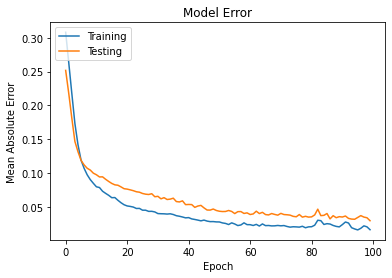

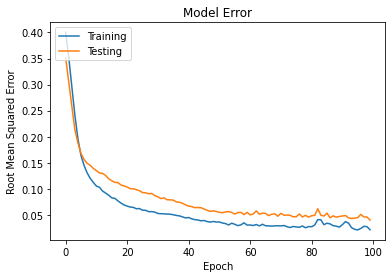

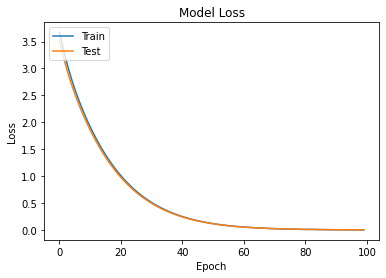

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_trained.history['mae'])
plt.plot(model_trained.history['val_mae'])
plt.title('Model Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.show()

plt.plot(model_trained.history['rmse'])
plt.plot(model_trained.history['val_rmse'])
plt.title('Model Error')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.show()

plt.plot(model_trained.history['loss'])
plt.plot(model_trained.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
def get_scores(output,y_true,scale=1):
  scores = []
  scores_h = []
  collect = []
  collect_h = []
  count = 0
  for i in range(len(output)):
    count += 1
    collect.append(output[i])
    collect_h.append(y_true[i])
    if count % 4 == 0:
      # collect = collect*25
      score = np.sum(collect)
      score_h = np.sum(collect_h)
      score = np.round(np.mean(collect)*scale)
      score_h = np.mean(collect_h)*scale
      scores.append(score)
      scores_h.append(score_h)
      collect = []
      collect_h = []

  def accuracy(pred,data):
    if data == 0 and pred > 0:
      return 0
    elif data == 0 and pred == 0:
      return 100
    else:
      return 100-(np.abs(pred-data)/data)*100

  accuracies = []
  for i in range(len(scores)):
    acc = accuracy(scores[i],scores_h[i])
    accuracies.append(acc)

  # print(accuracies)

  data = {'Human Rater':scores_h, 'Model':scores, 'Accuracy':accuracies}
  table = pd.DataFrame(data)
  # print(table)
  return table

In [ ]:
model_output = model.predict([X_l_te1, X_r_te1])
model_score = get_scores(model_output,Y_te1,100)
print(model_score)

    Human Rater  Model    Accuracy
0          10.0   18.0   20.000000
1           0.0    2.0    0.000000
2         100.0  100.0  100.000000
3          90.0   87.0   96.666667
4          80.0   64.0   80.000000
5          70.0   59.0   84.285714
6          60.0   47.0   78.333333
7          50.0   43.0   86.000000
8          40.0   32.0   80.000000
9          30.0   24.0   80.000000
10         20.0   23.0   85.000000
11         10.0   20.0    0.000000
12          0.0    1.0    0.000000
13        100.0  100.0  100.000000
14         90.0   83.0   92.222222
15         80.0   63.0   78.750000
16         70.0   51.0   72.857143
17         60.0   44.0   73.333333
18         50.0   50.0  100.000000
19         40.0   37.0   92.500000
20         30.0   25.0   83.333333
21         20.0   24.0   80.000000
22         10.0   18.0   20.000000
23          0.0    2.0    0.000000
24        100.0  100.0  100.000000
25         90.0   86.0   95.555556
26         80.0   64.0   80.000000
27         70.0   49

In [ ]:
model_training_output = model.predict([X_l_t1,X_r_t1])
training_score = get_scores(model_training_output,Y_t1,100)
print(training_score)

    Human Rater  Model    Accuracy
0         100.0  100.0  100.000000
1          90.0   89.0   98.888889
2          80.0   80.0  100.000000
3          70.0   70.0  100.000000
4          60.0   60.0  100.000000
..          ...    ...         ...
70         60.0   60.0  100.000000
71         50.0   50.0  100.000000
72         40.0   40.0  100.000000
73         30.0   30.0  100.000000
74         20.0   20.0  100.000000

[75 rows x 3 columns]


In [ ]:
X_l_t2,X_l_te2,X_r_t2,X_r_te2,Y_t2,Y_te2 = train_test_split(X_l_t_k,X_r_t_k,Y_train1_k,test_size=0.318,shuffle=False)

print(len(X_l_t2))
print(len(X_r_t2))
print(len(X_l_te2))
print(len(X_r_te2))
print(len(Y_t2))
print(len(Y_te2))

300
300
140
140
300
140


In [ ]:
model2 = get_model()
model_trained2 = model2.fit([X_l_t2,X_r_t2],Y_t2,batch_size=32,epochs=150,validation_data=([X_l_te2,X_r_te2],Y_te2), callbacks=[reduce_lr])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 300 samples, validate on 140 samples
Epoch 1/150
300/300 [==============================] - 5s 17ms/step - loss: 0.0943 - mae: 0.2356 - val_loss: 0.0718 - val_mae: 0.1974
Epoch 2/150
300/300 [==============================] - 3s 9ms/step - loss: 0.0712 - mae: 0.2004 - val_loss: 0.0561 - val_mae: 0.1736
Epoch 3/150
300/300 [==============================] - 3s 9ms/step - loss: 0.0532 - mae: 0.1698 - val_loss: 0.0446 - val_mae: 0.1563
Epoch 4/150
300/300 [==============================] - 3s 9ms/step - loss: 0.0398 - mae: 0.1465 - val_loss: 0.0368 - val_mae: 0.1432
Epoch 5/150
300/300 [==============================] - 3s 9ms/step - loss: 0.0317 - mae: 0.1307 - val_loss: 0.0316 - val_mae: 0.1331
Epoch 6/150
300/300 [==============================] - 3s 9ms/step - loss: 0.0256 - mae: 0.1187 - val_loss: 0.0284 - val_mae: 0.1261
Epoch 7/150
300/300 [==============================] - 3s 9ms/step - loss: 0.0219 - mae: 0.1105 - val_loss: 0.0265 - val_mae: 0.1220
Epoch 8/150
300/300 [=

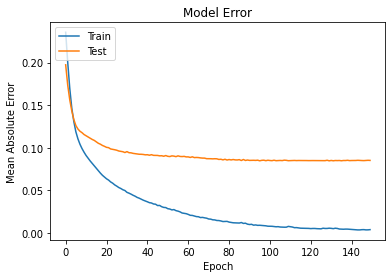

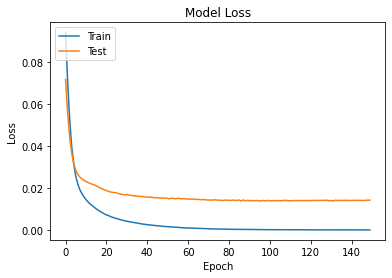

In [ ]:
plt.plot(model_trained2.history['mae'])
plt.plot(model_trained2.history['val_mae'])
plt.title('Model Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(model_trained2.history['loss'])
plt.plot(model_trained2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model_output2 = model2.predict([X_l_te2,X_r_te2])
model_score2 = get_scores(model_output2,Y_te2,100)
print(model_score2)

    Human Rater  Model    Accuracy
0          10.0   24.0  -40.000000
1           0.0    2.0    0.000000
2         100.0  100.0  100.000000
3          90.0   80.0   88.888889
4          80.0   75.0   93.750000
5          70.0   60.0   85.714286
6          60.0   51.0   85.000000
7          50.0   46.0   92.000000
8          40.0   29.0   72.500000
9          30.0   32.0   93.333333
10         20.0   23.0   85.000000
11         10.0   17.0   30.000000
12          0.0    2.0    0.000000
13        100.0  100.0  100.000000
14         90.0   82.0   91.111111
15         80.0   67.0   83.750000
16         70.0   62.0   88.571429
17         60.0   52.0   86.666667
18         50.0   40.0   80.000000
19         40.0   37.0   92.500000
20         30.0   26.0   86.666667
21         20.0   26.0   70.000000
22         10.0   21.0  -10.000000
23          0.0    2.0    0.000000
24        100.0  100.0  100.000000
25         90.0   74.0   82.222222
26         80.0   70.0   87.500000
27         70.0   51

In [ ]:
model_training_output2 = model2.predict([X_l_t2,X_r_t2])
training_score2 = get_scores(model_training_output2,Y_t2,100)
print(training_score2)

    Human Rater  Model  Accuracy
0         100.0  100.0     100.0
1          90.0   90.0     100.0
2          80.0   80.0     100.0
3          70.0   70.0     100.0
4          60.0   60.0     100.0
..          ...    ...       ...
70         60.0   60.0     100.0
71         50.0   50.0     100.0
72         40.0   40.0     100.0
73         30.0   30.0     100.0
74         20.0   19.0      95.0

[75 rows x 3 columns]


In [ ]:
model3 = get_model()
model3_trained = model3.fit([X_l_t,X_r_t],Y_train1,batch_size=32,epochs=150,validation_data=([X_l_te,X_r_te],Y_test1), callbacks=[reduce_lr])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 440 samples, validate on 140 samples
Epoch 1/150
440/440 [==============================] - 6s 14ms/step - loss: 0.1627 - mae: 0.3086 - val_loss: 0.6830 - val_mae: 0.8008
Epoch 2/150
440/440 [==============================] - 4s 8ms/step - loss: 0.1371 - mae: 0.2794 - val_loss: 0.6578 - val_mae: 0.7823
Epoch 3/150
440/440 [==============================] - 4s 8ms/step - loss: 0.1114 - mae: 0.2487 - val_loss: 0.6265 - val_mae: 0.7613
Epoch 4/150
440/440 [==============================] - 4s 9ms/step - loss: 0.0815 - mae: 0.2098 - val_loss: 0.5824 - val_mae: 0.7324
Epoch 5/150
440/440 [==============================] - 4s 8ms/step - loss: 0.0551 - mae: 0.1708 - val_loss: 0.5455 - val_mae: 0.7074
Epoch 6/150
440/440 [==============================] - 4s 8ms/step - loss: 0.0385 - mae: 0.1423 - val_loss: 0.5177 - val_mae: 0.6879
Epoch 7/150
440/440 [==============================] - 4s 8ms/step - loss: 0.0285 - mae: 0.1226 - val_loss: 0.4994 - val_mae: 0.6752
Epoch 8/150
440/440 [=

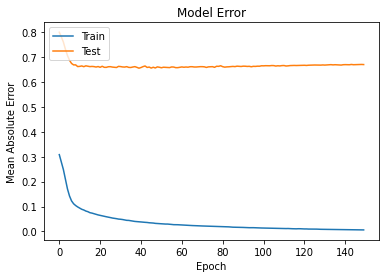

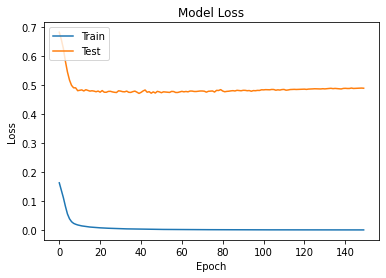

In [ ]:
plt.plot(model3_trained.history['mae'])
plt.plot(model3_trained.history['val_mae'])
plt.title('Model Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(model3_trained.history['loss'])
plt.plot(model3_trained.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model_output3 = model3.predict([X_l_te,X_r_te])
model_score3 = get_scores(model_output3,Y_test1,100)
print(model_score3)

    Human Rater  Model   Accuracy
0         92.50   18.0  19.459459
1         92.50   11.0  11.891892
2         77.50    8.0  10.322581
3         89.75   17.0  18.941504
4         87.50   20.0  22.857143
5         97.50   22.0  22.564103
6         90.00   13.0  14.444444
7         90.00   11.0  12.222222
8         85.00   21.0  24.705882
9         77.50   12.0  15.483871
10        85.00   26.0  30.588235
11        67.50   20.0  29.629630
12        92.50   22.0  23.783784
13        92.50   16.0  17.297297
14        87.50   27.0  30.857143
15        95.00   13.0  13.684211
16        92.50   18.0  19.459459
17        77.50   18.0  23.225806
18        87.50   19.0  21.714286
19        95.00   21.0  22.105263
20        92.50   27.0  29.189189
21        80.00    8.0  10.000000
22        82.50   18.0  21.818182
23        77.50   16.0  20.645161
24        80.00   18.0  22.500000
25        82.50   16.0  19.393939
26        80.00   23.0  28.750000
27        75.00   16.0  21.333333
28        90.0

In [ ]:
model_training_output3 = model3.predict([X_l_t,X_r_t])
training_score3 = get_scores(model_training_output3,Y_train1,100)
print(training_score3)

     Human Rater  Model    Accuracy
0          100.0  100.0  100.000000
1           90.0   89.0   98.888889
2           80.0   80.0  100.000000
3           70.0   70.0  100.000000
4           60.0   60.0  100.000000
..           ...    ...         ...
105         40.0   40.0  100.000000
106         30.0   30.0  100.000000
107         20.0   21.0   95.000000
108         10.0   10.0  100.000000
109          0.0    1.0    0.000000

[110 rows x 3 columns]


In [ ]:
model4 = get_model()
model4_trained = model4.fit([X_l_t_k,X_r_t_k],Y_train1_k,batch_size=32,epochs=150,validation_data=([X_l_te,X_r_te2],Y_test1), callbacks=[reduce_lr])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 440 samples, validate on 140 samples
Epoch 1/150
440/440 [==============================] - 6s 14ms/step - loss: 0.0806 - mae: 0.2090 - val_loss: 0.6555 - val_mae: 0.7882
Epoch 2/150
440/440 [==============================] - 4s 8ms/step - loss: 0.0552 - mae: 0.1682 - val_loss: 0.6340 - val_mae: 0.7742
Epoch 3/150
440/440 [==============================] - 4s 8ms/step - loss: 0.0382 - mae: 0.1378 - val_loss: 0.6143 - val_mae: 0.7611
Epoch 4/150
440/440 [==============================] - 4s 8ms/step - loss: 0.0276 - mae: 0.1174 - val_loss: 0.5995 - val_mae: 0.7510
Epoch 5/150
440/440 [==============================] - 4s 8ms/step - loss: 0.0209 - mae: 0.1037 - val_loss: 0.5892 - val_mae: 0.7438
Epoch 6/150
440/440 [==============================] - 4s 8ms/step - loss: 0.0160 - mae: 0.0924 - val_loss: 0.5825 - val_mae: 0.7391
Epoch 7/150
440/440 [==============================] - 4s 8ms/step - loss: 0.0132 - mae: 0.0849 - val_loss: 0.5765 - val_mae: 0.7347
Epoch 8/150
440/440 [=

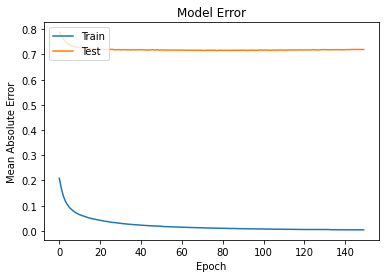

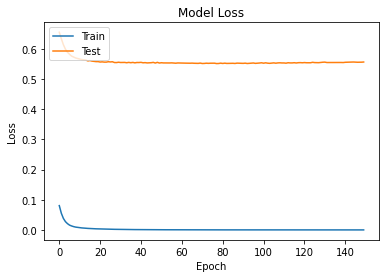

In [ ]:
plt.plot(model4_trained.history['mae'])
plt.plot(model4_trained.history['val_mae'])
plt.title('Model Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(model4_trained.history['loss'])
plt.plot(model4_trained.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model_output4 = model4.predict([X_l_te,X_r_te2])
model_score4 = get_scores(model_output4,Y_test1,100)
print(model_score4)

    Human Rater  Model   Accuracy
0         92.50   15.0  16.216216
1         92.50    6.0   6.486486
2         77.50    7.0   9.032258
3         89.75   10.0  11.142061
4         87.50   15.0  17.142857
5         97.50   35.0  35.897436
6         90.00    7.0   7.777778
7         90.00    9.0  10.000000
8         85.00   13.0  15.294118
9         77.50    8.0  10.322581
10        85.00   22.0  25.882353
11        67.50   15.0  22.222222
12        92.50   12.0  12.972973
13        92.50   17.0  18.378378
14        87.50   10.0  11.428571
15        95.00   16.0  16.842105
16        92.50   11.0  11.891892
17        77.50   11.0  14.193548
18        87.50   14.0  16.000000
19        95.00   12.0  12.631579
20        92.50   19.0  20.540541
21        80.00    4.0   5.000000
22        82.50   14.0  16.969697
23        77.50    9.0  11.612903
24        80.00   11.0  13.750000
25        82.50   19.0  23.030303
26        80.00   14.0  17.500000
27        75.00   13.0  17.333333
28        90.0

In [ ]:
model_training_output4 = model4.predict([X_l_t_k,X_r_t_k])
training_score4 = get_scores(model_training_output4,Y_train1_k,100)
print(training_score4)

     Human Rater  Model  Accuracy
0          100.0  100.0     100.0
1           90.0   90.0     100.0
2           80.0   80.0     100.0
3           70.0   70.0     100.0
4           60.0   60.0     100.0
..           ...    ...       ...
105         40.0   40.0     100.0
106         30.0   30.0     100.0
107         20.0   20.0     100.0
108         10.0    9.0      90.0
109          0.0    1.0       0.0

[110 rows x 3 columns]


In [ ]:
def export_csv(score,output,fname):
  f = '/content/drive/My Drive/KP-SEMINAR-SKRIPSI/SKRIPSI/Program/Output/'+fname
  tab = {'true':score,'prediction':output}
  dft = pd.DataFrame(tab)
  dft.to_csv(f,index=False,header=True)

In [ ]:
export_csv(Y_t1,model_training_output.flatten(),'skenario1_training.csv')
export_csv(Y_te1,model_output.flatten(),'skenario1_testing.csv')

In [ ]:
export_csv(Y_t2,model_training_output2.flatten(),'skenario1_training2.csv')
# export_csv(Y_te2,model_output2.flatten(),'skenario1_testing2.csv')

In [ ]:
export_csv(Y_test1,model_output3.flatten(),'skenario2_testing.csv')
export_csv(Y_train1,model_training_output3.flatten(),'skenario2_training.csv')

In [ ]:
export_csv(Y_test1,model_output4.flatten(),'skenario2_testing2.csv')
export_csv(Y_train1_k,model_training_output4.flatten(),'skenario2_training2.csv')

In [ ]:
f = '/content/drive/My Drive/KP-SEMINAR-SKRIPSI/SKRIPSI/Program/Output/'
model_score.to_csv(f+'skenario1_testing3.csv',index=False,header=True)
model_score2.to_csv(f+'skenario2_testing3.csv',index=False,header=True)
model_score3.to_csv(f+'skenario3_testing3.csv',index=False,header=True)
model_score4.to_csv(f+'skenario4_testing3.csv',index=False,header=True)

In [ ]:
training_score.to_csv(f+'skenario1_training3.csv',index=False,header=True)
training_score2.to_csv(f+'skenario2_training3.csv',index=False,header=True)
training_score3.to_csv(f+'skenario3_training3.csv',index=False,header=True)
training_score4.to_csv(f+'skenario4_training3.csv',index=False,header=True)